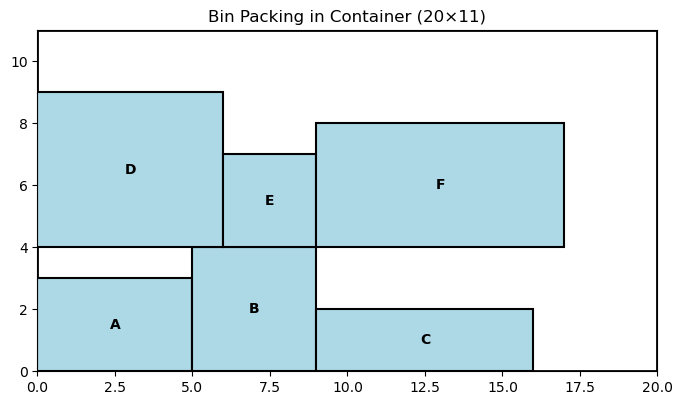

Placed bins: ['A', 'B', 'C', 'D', 'E', 'F']
Not placed bins: []


In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Input
W, H = 20, 11   # Container width & height

bins = {
    "A": (5, 3),
    "B": (4, 4),
    "C": (7, 2),
    "D": (6, 5),
    "E": (3, 3),
    "F": (8, 4)
}

# Choose one fill color for all bins
FILL_COLOR = "#ADD8E6"  # light blue

# Packing Algorithm (row by row)
placed = []
not_placed = []

x, y = 0, 0  # Current position
row_height = 0  # Max height of current row
placements = []  # Store bin placement info

for bid, (bw, bh) in bins.items():  # iterate in insertion order
    # If bin does not fit in container at all
    if bw > W or bh > H:
        not_placed.append(bid)
        continue

    # If bin doesn't fit in current row, move to new row
    if x + bw > W:
        x = 0
        y += row_height
        row_height = 0

    # If bin doesn't fit vertically, skip
    if y + bh > H:
        not_placed.append(bid)
        continue

    # Place the bin
    placements.append((bid, x, y, bw, bh))
    placed.append(bid)

    # Update cursor
    x += bw
    row_height = max(row_height, bh)

# Visualization
fig, ax = plt.subplots(figsize=(8, 6))

# Container outline
ax.add_patch(patches.Rectangle((0, 0), W, H, fill=False, edgecolor="black", linewidth=2))

# Draw bins (same color for all, black border)
for bid, x, y, bw, bh in placements:
    rect = patches.Rectangle((x, y), bw, bh, facecolor=FILL_COLOR, edgecolor="black", linewidth=1.5)
    ax.add_patch(rect)
    ax.text(x + bw/2, y + bh/2, bid, ha="center", va="center",
            fontsize=10, color="black", weight="bold")

ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.set_aspect("equal")
ax.set_title(f"Bin Packing in Container ({W}×{H})")
plt.show()

# Output results
print("Placed bins:", placed)
print("Not placed bins:", not_placed)
